# BRFSS - Short sleep analysis
## EDA and visualization

**BRFSS** ia a large phone anonymous survey conduceted **every year** through a state and federal collaboration and with **NHANES** represents the main US risk factor Surveillance. 

BRFSS is conducted by the **CDC** (Centers for Diseases Control and Prevention, the U.S federal agency) and it's composed by "Core" questions and "modules"

The "core" datasets are public and used by both governmental and independent researches.

The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population. Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention, physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per household) through a telephone survey.

KPI is a type of performance measurement that helps you understand how your organization or department is performing.
In healthcare, there may only be limited scientific evidence to support a KPI and it becomes
necessary to avail of expert opinion.
They can make a national map and figure out where smoking prevalence is highest, and then target areas to encourage smoking cessatios.

## BRFSS  resources: 

* Dataset:
 - [**BRFSS Dataset 2016**](https://www.cdc.gov/brfss/annual_data/2016/files/LLCP2016XPT.zip)
 - [**BRFSS Dateset 2014**](http://www.cdc.gov/brfss/annual_data/2014/files/LLCP2014XPT.ZIP)
 - [**BRFSS Dateset 2013**](http://www.cdc.gov/brfss/annual_data/2013/files/LLCP2013XPT.ZIP)

* General info and mapping and summary statistics about each variable:
 - [**2016 Info and Codebook report**](https://www.cdc.gov/brfss/annual_data/annual_2016.html): 
 - [**2014 Info and Codebook report**](https://www.cdc.gov/brfss/annual_data/annual_2014.html)
 - [**2013 Info and Codebook report**](https://www.cdc.gov/brfss/annual_data/annual_2013.html)


* [**Historical questions database**](https://chronicdata.cdc.gov/Behavioral-Risk-Factors/Behavioral-Risk-Factor-Surveillance-System-BRFSS-H/iuq5-y9ct): questions/variable per year

In the BRSFSS Dataset 2015 the question "On average, how many hours of sleep do you get in a 24-hour period?" was not included.

## Getting started

Let's start importing some usefull libraries and settings:


In [86]:
%matplotlib inline 
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import matplotlib.style as style
import seaborn as sns 


#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)

mpl.rcParams['figure.figsize'] = (20.0, 10.0)

sns.set_context("notebook")
sns.set()
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("Set2", 10))

style.use('fivethirtyeight')

# Load the Datasets

The data load performs basically two data selection operations:

- **"df_YYYY"** dataframe: first, it loads the full datasets, one per year, prepared in LINK notebook LINK

They contains the some number of record of the original BRFSS survey but just the columns I need for my analysis.

- **"final"** dataframe: the concatenation of the "df_YYYY" dataframes

- **"df_YYY_short_sleep"** dataframe: a filtered dataframe just with records from "Short sleep" people (with the "sleepH" field <7)

- **final_short_sleep**: the concatenation of the "df_YYY_short_sleep" dataframes

The field "SLEEP" is a Boolean. 

True: >= 7 hours

False: < 7 hours (short sleep staus)




In [87]:
years = ["2013","2014","2016"] 
##qui sotto spiegare che si può fare ciclo--

In [88]:
df_2016 = pd.read_csv('brfss2016clean.csv',sep='\t', header=0,  dtype='category')
df_2016['y'] = '2016'
df_2016.head()
print("# 2016 Number of rows:", len(df_2016))

# 2016 Number of rows: 480577


In [89]:
df_2014 = pd.read_csv('brfss2014clean.csv',sep='\t', header=0,  dtype='category')
df_2014['y'] = '2014'
df_2014.head()
len (df_2014)
print("# 2014 Number of rows:", len(df_2014))

# 2014 Number of rows: 458172


In [90]:
df_2013 = pd.read_csv('brfss2013clean.csv',sep='\t', header=0,  dtype='category')
df_2013['y'] = '2013'
df_2013.head()
len (df_2013)
print("# 2013 Number of rows:", len(df_2013))

# 2013 Number of rows: 484401


## Full dataset: *"final"*
The population of the three dataset are pretty similar so we can assume that the samples are similar and we can make some analyis based on these.

Let's concat all dataframe in a single one to have a bigger data set --> "Final" dataframe

In [91]:
allDf = [df_2013,df_2014,df_2016]
final = pd.concat(allDf)
print("# Final - Number of rows:", len(final))

# Final - Number of rows: 1423150


In [93]:
#final.to_csv('brfss_13_14_16.csv',sep='\t', encoding='utf-8', index=False)

In [8]:
#Check data
final.groupby('y').size()

y
2013    484401
2014    458172
2016    480577
dtype: int64

## Dataset filtered on "short sleep" entries: 

It is important to note that while the broad population 2016 is approximately 480.000 samples, the "Short sleep" segment from BRFSS yields 153.523 samples. Please see below the table for every years.

#### Final full years short_sleep:

In [9]:
final_short_sleep= final[final['sleep'] == 'False'] #filter to only rows where sleep == True

#### 2016 short sleep dataset:

In [131]:
df_2016_short_sleep= df_2016[df_2016['sleep'] == 'False'] #filter to only rows where sleep == True

#### 2014 short sleep dataset:

In [13]:
df_2014_short_sleep= df_2014[df_2014['sleep'] == 'False'] #filter to only rows where sleep == True

#### 2013 short sleep dataset:

In [14]:
df_2013_short_sleep= df_2013[df_2013['sleep'] == 'False'] #filter to only rows where sleep == True

# Sleep Hours per night 
### On average, how many hours of sleep do you get in a 24-hour period?

For the general population, we have the following reported sleep distribution:

- The distributions is calculated using the 2016 dataset (480.577 people).

- The majority of males and females both sleep between 7 and 8 hours per day.

- The mean is 7.05 hours, the STD is 1.48 hour

MEAN:  7.054295149372525
STD:  1.4874194129122544


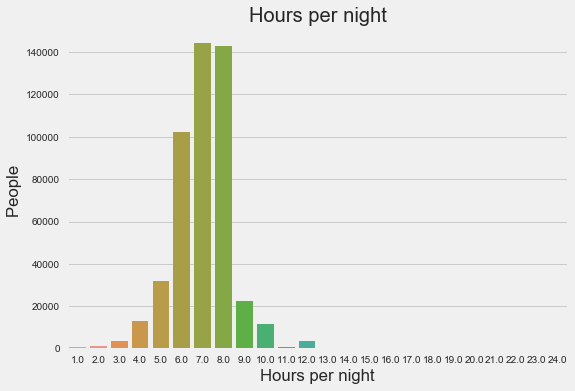

In [138]:
print ("MEAN: ", df_2016['sleepH'].mean())
print ("STD: ", df_2016['sleepH'].std())
df_2016['sleepH']= df_2016['sleepH'].astype(float)
sleep_hour_distro = sns.countplot(x="sleepH", data=df_2016)
sleep_hour_distro.set_xlabel("Hours per night")
sleep_hour_distro.set_ylabel("People ")
sleep_hour_distro.set_title("Hours per night")

# Short sleep Trend by year

In [ ]:
final.dtypes

In [65]:
final_y = final[['sleep','y','state']]

In order to calculate % later, I need to cast from Categories to Object "sex", "year", "sleep" and "country"

In [101]:
final['sleep'] = final['sleep'].astype('object')
final['y'] = final['y'].astype('object')
final['sex'] = final['sex'].astype('object')
final['state'] = final['state'].astype('object')

In [102]:
final_y= final.groupby(['y','sleep']).size().unstack().reset_index()
final_y['Tot'] =  final_y['False'] + final_y['True']
final_y['pct'] =  final_y['False'] / final_y['Tot']
final_y = final_y[['y','pct']]

In [103]:
final_y

sleep,y,pct
0,2013,0.327489
1,2014,0.315150
2,2016,0.319456


In [69]:
final.groupby(['y','sleep']).size()

y     sleep
2013  False    158636
      True     325765
2014  False    144393
      True     313779
2016  False    153523
      True     327054
dtype: int64

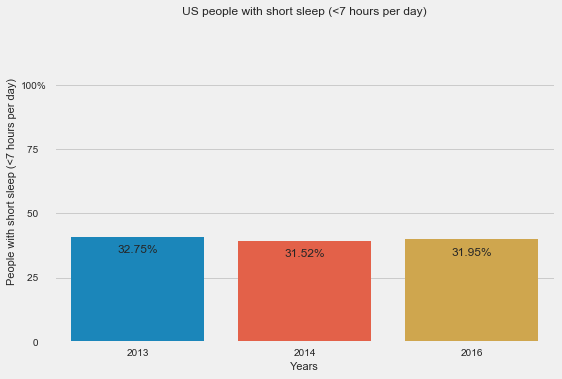

In [73]:
#With Seaborn
bar_plot = sns.barplot(x=final_y["y"],y=final_y["pct"])
bar_plot.set_xlabel("Years")
bar_plot.set_ylabel("People with short sleep (<7 hours per day)")
bar_plot.set_title("US people with short sleep (<7 hours per day)")
#bar_plot.tick_params(axis = 'both', which = 'major', labelsize = 12)
bar_plot.set_yticklabels(labels = ['0   ', '25   ', '50   ', '75   ','100%'])
#bar_plot.set_xticklabels(labels = ['2013', '2014', '2016'])
bar_plot.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#Insert labels on top
barwidth = [0.8, 0.8, 0.8, 0.8]
bar_plot.set_ylim(0, 1)

label_ = final_y.pct
for bar,newwidth, label in zip(bar_plot.patches,barwidth, label_):
    x = bar.get_x()
    width = bar.get_width()
    height = bar.get_height()
    centre = x + width/2.
    bar.set_x(centre-newwidth/2.)
    bar.set_width(newwidth)
    bar_plot.text(x+width/2., height - 0.05,  '{0:4.2f}'.format(label*100)+"%", ha="center") 
   

# Countries and Short sleep 

## Which is the country with the highest percentage of "short sleep" people?

# Sex and Short sleep
Let's analize the distributions between sex and short sleep

In [105]:
final_y_tot= final.groupby(['y','sex','sleep']).size().unstack().reset_index()

final_y_tot['Tot']  =  final_y_tot['False'] + final_y_tot['True']
final_y_tot['%'] =  final_y_tot['False'] / final_y_tot['Tot']*100


sleep,y,sex,False,True,Tot,%
0,2013,M,65598,133273,198871,32.985201
1,2013,W,93038,192492,285530,32.584317
2,2014,M,60698,130158,190856,31.803035
3,2014,W,83695,183621,267316,31.309387
4,2016,M,67024,141543,208567,32.135477
5,2016,Refused,26,32,58,44.827586
6,2016,W,86473,185479,271952,31.797155


In [110]:
final_y_tot = final_y_tot[["y","sex","%"]]

In [75]:
final_short_sleep.groupby(['y','sex']).size()

y     sex    
2013  M          65598
      W          93038
2014  M          60698
      W          83695
2016  M          67024
      Refused       26
      W          86473
dtype: int64

In [76]:
#Calculate proportion
final_y= final_short_sleep.groupby(['y','sex']).size().unstack().reset_index()

In [77]:
final_y['Tot']  =  final_y['M'] + final_y['W']
final_y['% Men'] =  final_y['M'] / final_y['Tot']*100
final_y['% Woman'] =  final_y['W'] / final_y['Tot']*100
final_y= final_y[['y','% Men','% Woman']]

## Woman are more likely to report not getting enough sleep than men

In [78]:
final_y.set_index('y')
final_y.round(2) #round to 2 decimals 

sex,y,% Men,% Woman
0,2013,41.35,58.65
1,2014,42.04,57.96
2,2016,43.66,56.34


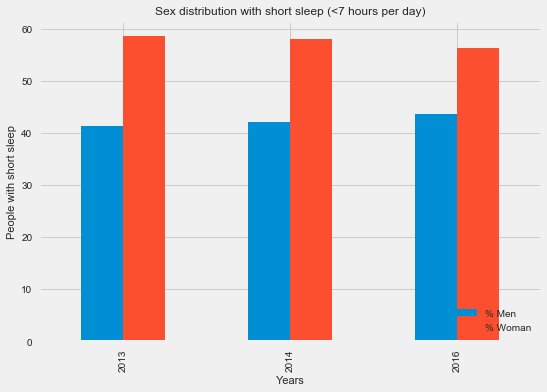

In [79]:
bar_plot=final_y.plot(x='y', kind='bar', grid=True )
#bar_plot.set_color_cycle(colors)
#bar_plot.set_aspect("equal") 
bar_plot.set_xlabel("Years")
bar_plot.set_ylabel("People with short sleep")
bar_plot.set_title("Sex distribution with short sleep (<7 hours per day)")

L=bar_plot.legend(loc="lower right")
#L.get_texts()[0].set_text('Men %')
#L.get_texts()[1].set_text('Woman %')

#Descrivere che c'è una diminuzione tra le donne che rimangono comunque più alte   

## Educationa level and Short Sleep
Let's check the Education Level inside the group with spleep disorders

In [80]:
#Education categories in the full dataset
final.groupby(['y','education']).size()

y     education            
2013  Attended college/tec     132698
      Don't know                 2057
      Graduated High School    140381
      Graduated college/tec    168996
      No High School            40269
2014  Attended college/tec     124210
      Don't know                 3570
      Graduated High School    128986
      Graduated college/tec    165922
      No High School            35484
2016  Attended college/tec     132087
      Don't know                 1617
      Graduated High School    134601
      Graduated college/tec    175795
      No High School            36477
dtype: int64

In [81]:
final_short_sleep.groupby(['y','education']).size()

y     education            
2013  Attended college/tec     46255
      Don't know                 659
      Graduated High School    49476
      Graduated college/tec    46441
      No High School           15805
2014  Attended college/tec     42060
      Don't know                1174
      Graduated High School    44343
      Graduated college/tec    43336
      No High School           13480
2016  Attended college/tec     45113
      Don't know                 492
      Graduated High School    46714
      Graduated college/tec    47306
      No High School           13898
dtype: int64

## Let's analize education and short sleep during the 2016.

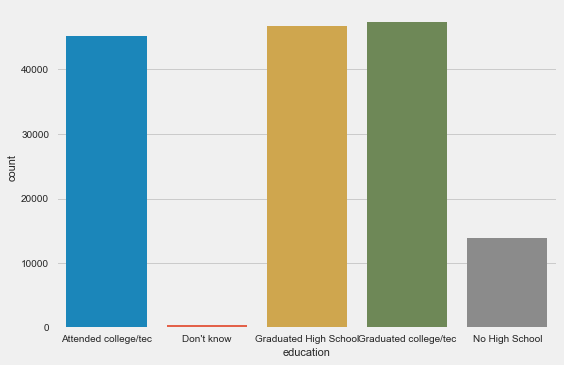

In [82]:
ax = sns.countplot(x="education", data=df_2016_short_sleep)

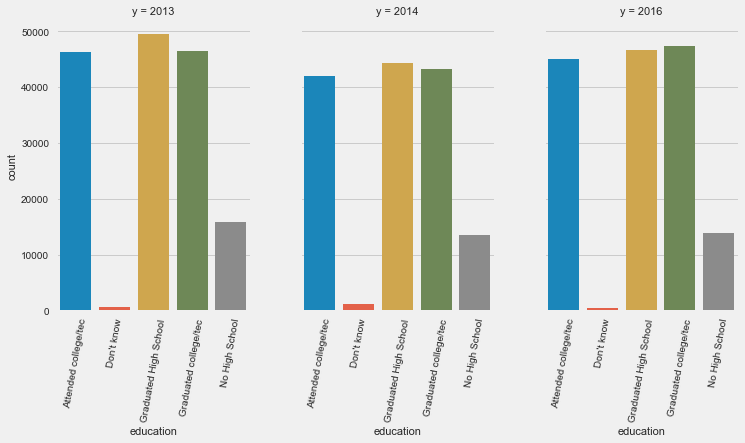

In [83]:
g = sns.factorplot(x="education",  col="y",
                   data=final_short_sleep, kind="count",  size=5, aspect=.7);
g.set_xticklabels(rotation = 80)

In [126]:
test = df_2016_short_sleep.groupby(['sex','education']).size()
test.traspose()
#dfscience.transpose().loc[['after', 'before'], :].plot(kind="barh", stacked=True)
#plt.legend(loc=2, ncol=5);

AttributeError: 'Series' object has no attribute 'traspose'

# Scatter Plot Matrix - Feature feature relationships

Let's compare for 5 continuous features filtering on people with "Short Sleep" to check relationships between the attributes. We are using all categorical variables so we need to represent them as numbers, typically one converts each categorical feature using “one-hot encoding”.



The final important relationship to explore is that of the relationships between the attributes.
- BMI Four-categories of Body Mass Index 
- smoker
- sleep hours
- physical activity
 
with the diagonal being a kernel density estimate.
I need to use the function dummies because in the original dataframa we have Categorical series.

In [122]:
df_2013_short_sleep
sns.boxplot(x="bmi", y="sleepH", hue="sex", data=df_2013_short_sleep);

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [121]:

#df_2016_dummy = pd.get_dummies(df_2016)


In [ ]:
scatter_matrix = sns.PairGrid(df_2016_dummy, vars=['bmi', 'smoker', 'sleeph', 'physical_activity'])
scatter_matrix.map_diag(sns.kdeplot)
gscatter_matrix.map_offdiag(plt.scatter, s=15)

## BMI Body Mass level and Short Sleep
Let's check the BMI inside the group with spleep disorders

In [85]:
df['bmi'].value_counts()[:20].plot(kind='barh')   

NameError: name 'df' is not defined

In [ ]:
sleep_by_state = final.groupby(['state','sleep']).size().unstack()
#plt.figure(figsize=(4, 6))
ax = plt.gca()
sleep_by_state.plot(kind="bar", stacked=True )
plt.grid(axis = 'x', color ='white', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine()

In [ ]:
sns.set_color_codes("pastel")
sns.barplot(x="sleep", y="state", data=sleep_by_state,
            label="Total", color="b")



In [ ]:
state_sleep = final.groupby(['state', 'sleep']).agg({'sleep': 'count'})
state_pcts = state_sleep.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
x= state_pcts["state"=='AL']
x.plot(kind='barh')
#pct_change(periods=4)
#state_pcts['sleep'== 'False']

In [ ]:
count_mpg = final.groupby(['sex']).sex.count()

with sns.plotting_context("poster"):
    ax = plt.gca()
    count_mpg.plot(kind="barh")
    plt.grid(axis = 'x', color ='white', linestyle='-')
    ax.tick_params(axis='both', which='both',length=0)
    sns.despine(left=True, bottom=True)

In [ ]:
#df_final.groupby('state').agg({'sleep': [np.size, np.mean]})

In [ ]:
#I want to calculate the percentage of sales per office in a given state (total of all percentages in each state is 100%).
state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state_office.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
state_pcts

In [ ]:
state_sleep = df_out.groupby('sleep').state.count()

In [ ]:
#PIE CHART
plt.figure(figsize=(2,2), dpi=150)
plt.pie(final_y.pct, autopct='%1.1f%%', startangle=270)
